In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

colors = sns.color_palette("husl", 7)

clusters_colors = [
"#e74c3c", 
"#9b59b6", 
"#3498db", 
# "#95a5a6", 
# "#34495e", 
"#2ecc71",
]

In [2]:
version = 9
year    = 2014
country = 'tanzania'
key     = country+'_'+str(year)
outcome = 'crop_sales___output'
data    = pd.read_excel('./Tables/tanzania_v'+str(version)+'/LSMS_Tanzania_2014_v'+str(version)+'.xlsx',index_col=0)
lat_lon = pd.read_excel('./Tables/tanzania_v'+str(version)+'/LSMS_Tanzania_2014_lat_and_long_coordinates only.xlsx',index_col=0)

In [3]:
# Fixing Lat Long
data = pd.merge(
data.drop(['latitude_'+key,'longitude_'+key],1).reset_index(),
lat_lon.reset_index(),
on=['y4_hhid'],
how='inner').set_index('y4_hhid')

convert_headers = {
'HH_divorce': 'household_head_is_divorced',
'HH_head_mono': 'household_head_is_monogamous',
'HH_head_poly': 'household_head_is_polygamous',
'HH_male': 'household_head_is_male',
'HH_nevermar': 'household_head_never_married',
'HH_seperated': 'household_head_is_separated',
'HH_shock': 'household_shock',
'HH_widow': 'household_head_is_widowed',
'amt_assist_rec': 'amount_assistance_received___policy',
'par_atten_school': 'attended_school',
'children_education': 'children_education___output',
'crop_diverse': 'crop_diversification___policy',
'crop_sales': 'crop_sales___output',
'dist_market': 'distance_to_market',
'dist_road': 'distance_to_road',
'expenditure': 'expenditure___output',
'has_bank_account': 'has_bank_account___policy',
'has_borrowed': 'has_borrowed___policy',
'has_hire_work': 'has_hired_workers___policy',
'has_medical': 'has_medical_assistance___output',
'has_savings': 'has_savings___policy',
'has_work_fem': 'has_working_female',
'heavy_rain_erosion': 'heavy_rain_erosion',
'household_h_age': 'household_head_age',
'household_size': 'household_size',
'illness_hh_member': 'illness_of_household_member___policy',
'inc_in_price': 'increase_in_price',
'land_surface': 'land_surface',
'literacy': 'literacy',
'no_food_def': 'no_food_deficiency___output',
'number_animal_own': 'number_of_animals_owned___policy',
'number_of_plough': 'number_of_ploughs_owned___policy',
'num_hire_worker':'number_of_hired_workers___policy',
'owns_certificate': 'owns_land_certificate___policy',
'post_damage': 'damaged_crop___policy',
'quant_fert': 'quantity_of_fertilizers_used___policy',
'quant_impro_seed': 'quantity_of_improved_seeds_used___policy',
'quant_pest': 'quantity_of_pesticides_used___policy',
'receive_assistance': 'receives_assistance___policy',
'rural_HH': 'rural_household',
'soil_long': 'soil_long',
'soil_short': 'soil_short',
'uses_cred': 'uses_credit___policy',
'uses_extension': 'uses_advice___policy',
'uses_irr': 'uses_irrigation___policy',
}

convert_regions = dict((x,'lives_in_'+x.split('_')[-1].lower()) for x in [
'liv_in_ARUSHA',
'liv_DARESSALAAM',
'liv_DODOMA',
'liv_GEITA',
'liv_IRINGA',
'liv_KAGERA',
'liv_KASKAZINIPEMBA',
'KASKAZINIUNGUJA',
'KATAVI',
'KIGOMA',
'KILIMANJARO',
'KUSINIPEMBA',
'KUSINIUNGUJA',
'MANYARA',
'MARA',
'MBEYA',
'MJINIMAGHARIBI',
'MOROGORO',
'MTWARA',
'MWANZA',
'NJOMBE',
'PWANI',
'RUKWA',
'RUVUMA',
'SHINYANGA',
'SIMIYU',
'SINGIDA',
'TABORA',
'TANGA',])

data = data.rename(columns=lambda x:convert_headers.get(
x.replace('_tanzania_2014',''),x.replace('_tanzania_2014','')))

data = data.rename(columns=lambda x:convert_regions.get(x,x))

data.reset_index(drop=True,inplace=True)

data['months_hired_workers___policy'] = data.filter(regex='hire_wrk').sum(1)
data.drop(data.filter(regex='hire_wrk').columns,1,inplace=True)

data = pd.concat([
data.filter(regex='output').sort_index(1),
data.filter(regex='policy').sort_index(1),
data.drop(data.filter(regex='output').columns,1).drop(data.filter(regex='policy').columns,1),],1)

data.loc[data['crop_sales___output']==0,'crop_sales___output'] = np.nan
data['rural_household'] = data['rural_household'].apply(lambda x:(2-x))

to_remove = [
'damaged_crop___policy',
'illness_of_household_member___policy',
'receives_assistance___policy',
'household_shock',
'increase_in_price',
'has_working_female',
'soil_long',
'soil_short',
'heavy_rain_erosion',
'amount_assistance_received___policy',
'uses_advice___policy',
'has_savings___policy',
# 'has_hired_workers___policy',
# 'months_hired_workers___policy',
'quantity_of_improved_seeds_used___policy',
'weight',
]

data.drop(to_remove,1,inplace=True)

data.rename(columns={'hhweight':'weight'},inplace=True)

In [4]:
data.filter(regex='output').describe()

,children_education___output,crop_sales___output,expenditure___output,has_medical_assistance___output,no_food_deficiency___output
count,2726.000000,1.474000e+03,3.344000e+03,3344.000000,3342.000000
mean,0.428701,6.505447e+05,4.257611e+06,0.278771,0.632555
std,0.370846,1.571738e+06,3.430570e+06,0.287168,0.482181
min,0.000000,1.500000e+03,6.794507e+04,0.000000,0.000000
25%,0.000000,7.800000e+04,2.057121e+06,0.000000,0.000000
50%,0.500000,2.200000e+05,3.341657e+06,0.200000,1.000000
75%,0.666667,5.827500e+05,5.351428e+06,0.465909,1.000000
max,1.000000,2.240000e+07,4.543786e+07,1.000000,1.000000


In [5]:
data.drop(
data.filter(regex='policy'),1).drop(
data.filter(regex='output'),1).drop(
data.filter(regex='household'),1).describe()

,attended_school,distance_to_road,distance_to_market,land_surface,literacy,lives_in_arusha,lives_in_daressalaam,lives_in_dodoma,lives_in_geita,lives_in_iringa,...,lives_in_ruvuma,lives_in_shinyanga,lives_in_simiyu,lives_in_singida,lives_in_tabora,lives_in_tanga,weight,clusterid,latitude,longitude
count,3344.000000,2086.000000,2086.000000,3344.000000,3344.000000,3344.000000,3344.000000,3344.000000,3344.000000,3344.000000,...,3344.000000,3344.000000,3344.000000,3344.000000,3344.000000,3344.000000,3344.000000,3.344000e+03,3344.000000,3344.000000
mean,0.678187,2.343662,8.879709,2.783301,0.606939,0.026316,0.165072,0.021531,0.026316,0.026316,...,0.021232,0.033493,0.035586,0.016746,0.043062,0.028708,3027.878726,1.789977e+11,-5.729578,36.158421
std,0.279104,5.232050,12.126191,9.010723,0.305418,0.160097,0.371301,0.145168,0.160097,0.160097,...,0.144179,0.179946,0.185284,0.128339,0.203028,0.167010,1848.385931,1.573469e+11,2.446851,3.119779
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,112.679600,1.011210e+10,-11.349372,29.603563
25%,0.500000,0.000000,3.000000,0.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1835.501000,7.020720e+10,-6.887772,33.363623
50%,0.666667,1.000000,5.416666,0.000000,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2710.516000,1.306120e+11,-6.097153,36.833138
75%,1.000000,3.000000,10.000000,2.192500,0.833333,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3765.492000,2.102230e+11,-3.617599,39.221331
max,1.000000,120.000000,250.000000,187.390000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8999.028000,5.502270e+11,-1.116820,40.278737


In [6]:
data.to_csv('./Tables/tanzania_v'+str(version)+'/tanzania_clean_v'+str(version)+'_lat_long_fixed.csv')

# Cross Correlations

In [13]:
to_drop = [
'weight',
'clusterid',
'latitude',
'longitude',
'nid',
'y4_hhid',
# 'uses_irrigation___policy',
# 'owns_land_certificate___policy',
# 'uses_credit___policy',
# 'soil_short',
# 'amount_assistance_received___policy',
# 'has_borrowed___policy',
# 'has_savings___policy',
# 'damaged_crop___policy',
# 'illness_of_household_member___policy',
# 'soil_long',
# 'has_working_female',
# 'literacy',
# 'number_of_ploughs_owned___policy',
# 'quantity_of_chemical_fertilizers_used___policy'
]

outputs  = list(data.filter(regex='output').columns)
policies = list(data.filter(regex='policy').columns)

In [7]:
bars_policy = pd.concat([
data[[x for x in data.columns if 'output' in x or 'policy' in x]].corr(
'spearman').filter(regex='output').dropna().drop(outputs).drop(to_drop,errors='ignore').rename(
columns=lambda x:x.replace('___output','').replace('_',' ').title()).rename(
lambda x:x.replace('___policy','').replace('_',' ').title()),
data[[x for x in data.columns if 'output' in x or 'policy' in x]].corr(
'spearman').filter(regex='output').dropna().drop(outputs).drop(to_drop,errors='ignore').rename(
columns=lambda x:x.replace('___output','').replace('_',' ').title()).rename(
lambda x:x.replace('___policy','').replace('_',' ').title()).mean(1).rename('Average')],1).sort_values(
by='Average')

In [8]:
bars_non_policy = pd.concat([
data[[x for x in data.columns if 'policy' not in x]].corr(
'spearman').filter(regex='output').dropna().drop(outputs).drop(to_drop,errors='ignore').rename(
columns=lambda x:x.replace('___output','').replace('_',' ').title()).rename(
lambda x:x.replace('___policy','').replace('_',' ').title()),
data[[x for x in data.columns if 'policy' not in x]].corr(
'spearman').filter(regex='output').dropna().drop(outputs).drop(to_drop,errors='ignore').rename(
columns=lambda x:x.replace('___output','').replace('_',' ').title()).rename(
lambda x:x.replace('___policy','').replace('_',' ').title()).mean(1).rename('Average')],1).sort_values(
by='Average')

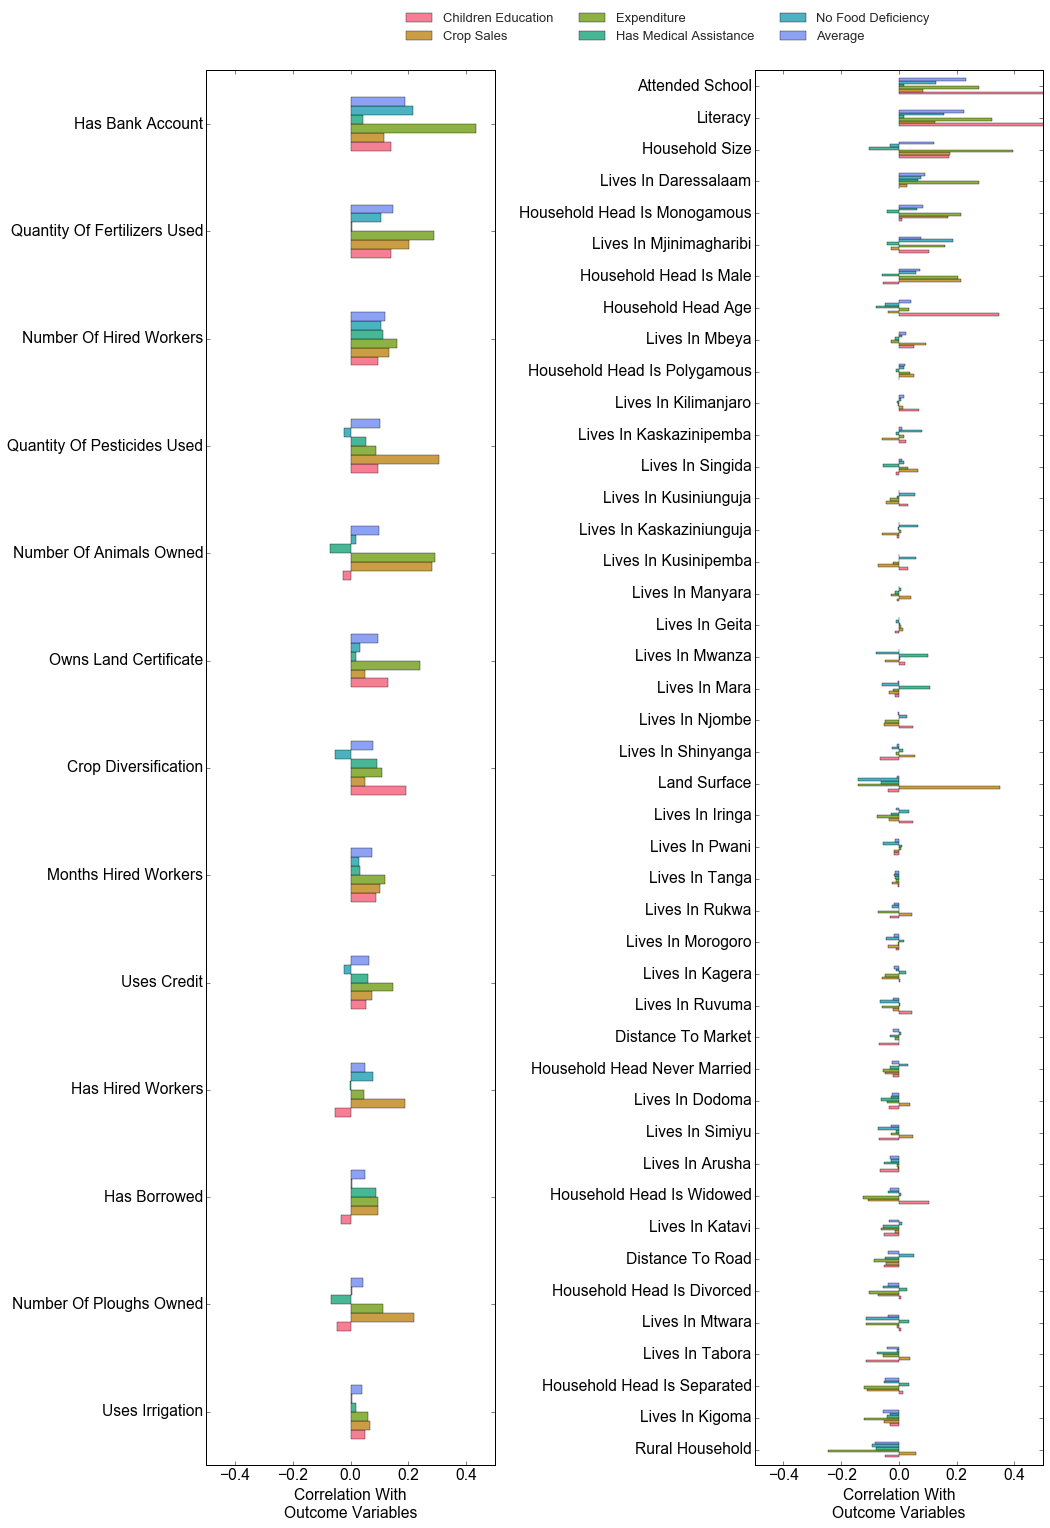

In [10]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(15,25))
plt.subplots_adjust(wspace=0.9)
    
with sns.axes_style("white"):
    sns.set_style("ticks")
    sns.set_context("talk")
    
    for i,bars in enumerate([bars_policy,bars_non_policy]):
        
        bars.plot(
        ax=ax[i],
        kind='barh',
        color=colors,
        alpha=0.9,
        legend=[True,False][i])
        
        ax[i].set_xlim([-0.5,0.5])
        ax[i].set_xlabel('Correlation With\nOutcome Variables')
        ax[i].tick_params(direction='in',pad=3)
        ax[i].locator_params(axis='x',nbins=6)
        if not i:
            ax[i].legend(loc='upper center', bbox_to_anchor=(1.6, 1.05), ncol = 3)
            
    path = './Plots/'+country+'_v'+str(version)+'/cross_correls_'+key+'_v'+str(version)+'.pdf'
    plt.savefig(path,bbox_inches='tight')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a0b06e470>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1a0ee2f780>], dtype=object)

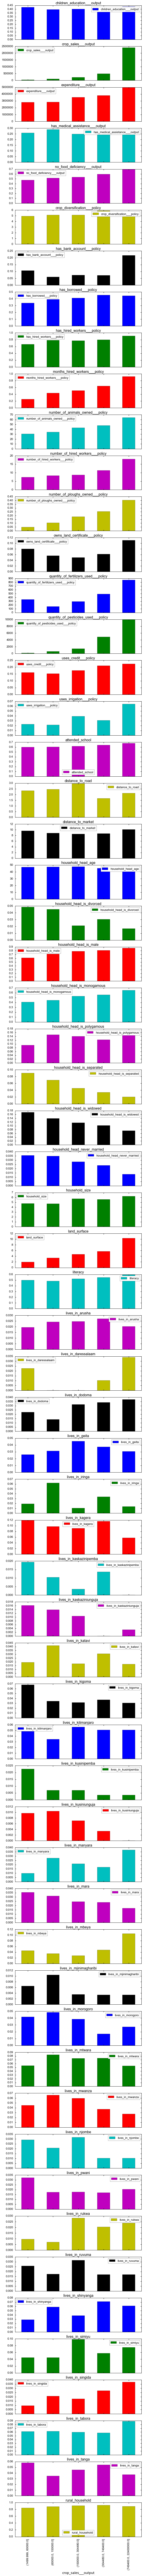

In [11]:
data.drop(to_drop,1,errors='ignore').groupby(
pd.qcut(data['crop_sales___output'],5)).mean().plot(
kind='bar',subplots=True,figsize=(10,200))

# Summary Statistics

In [9]:
def get_label(variable):
    
    y_label = variable.replace(
    '___policy','').replace(
    '___output','').replace('_',' ').title()

    if y_label == 'Land Surface':
        y_label = y_label+' (in Ha)'
    if y_label == 'Distance To Road':
        y_label = y_label+' (in Km)'
    if y_label == 'Distance To Market':
        y_label = y_label+' (in Km)'
    elif y_label == 'Quantity Of Fertilizers Used':
        y_label = y_label+' (in Kg)'
    elif y_label == 'Quantity Of Pesticides Used':
        y_label = y_label+' (in Liters)'
    elif y_label == 'Crop Sales':
        y_label = y_label+' (in Shilling)'
    elif y_label == 'Household Size':
        y_label = 'Number of Households Members'
    elif y_label == 'Literacy':
        y_label = y_label+' Rate'
    elif y_label == 'Crop Diversification':
        y_label='Number of Crops Planted'
    elif y_label == 'Has Saved':
        y_label='Fraction of Households Who Saved'
    elif y_label == 'Has A Bank Account':
        y_label='Fraction of Households With A Bank Account'
    elif y_label == 'Expenditure':
        y_label='Expenditure (in Shilling)'
    elif y_label == 'Has Medical Assistance':
        y_label='Fraction of Households Using Medical Assistance'
    elif y_label == 'Uses Credit':
        y_label='Fraction of Households Using Credit Services'
    elif y_label == 'Owns Land Certificate':
        y_label='Fraction of Households Owning A Land Certificate'
    elif y_label == 'No Food Deficiency':
        y_label='Fraction of Households Without Food Deficiencies'
    elif y_label == 'Household Head Is Monogamous':
        y_label='Fraction of Monogamous'
    elif y_label == 'Household Head Is Polygamous':
        y_label='Fraction of Polygamous'
    elif y_label == 'Household Head Is Separated':
        y_label='Fraction of Separated'
    elif y_label == 'Household Head Is Widowed':
        y_label='Fraction of Widow'
    elif y_label == 'Household Head Is Divorced':
        y_label='Fraction of Divorced'
    elif y_label == 'Household Head Is Male':
        y_label='Fraction of Male-headed Households'
    elif y_label == 'Household Head Is Female':
        y_label='Fraction of Female-headed Households'
    elif y_label == 'Has Borrowed':
        y_label='Fraction of Households Who Have Borrowed'
    elif y_label == 'Has Bank Account':
        y_label='Fraction of Households Having A Bank Account'
    elif y_label == 'Months Hired Workers':
        y_label='Number of Months Hiring Workers'
    elif y_label == 'Uses Irrigation':
        y_label='Fraction of Households Using Irrigation'
    elif y_label[:8] == 'Lives In':
        y_label='Fraction Of Households Living In'+y_label.split('Lives In')[1]
    elif y_label == 'Rural Household':
        y_label='Fraction of Rural Households'
    elif y_label == 'Productivity':
        y_label='Yield (in Schilling per Acre)'
    return y_label

In [10]:
path_to_sum_stats = './Tables/'+country+'_v'+str(version)+'/clustering_v'+str(version)+'/crop_sales___output_avg.csv'
sum_stats = pd.read_csv(path_to_sum_stats,index_col=0)

sum_stats = pd.concat([
sum_stats.filter(regex='mean'),
sum_stats.filter(regex='stddev'),
sum_stats.filter(regex='stderr'),
],1).iloc[:4]

In [11]:
def get_table(list_vars,name):
    
    table = pd.concat([
    pd.concat([
    sum_stats['mean_'+x],
    sum_stats['stddev_'+x],
    ],1,keys=['Avg.','Stdev.']) for x in list_vars],1,
    keys=[get_label(x.replace('mean_','')) for x in list_vars]).copy()
    
    # Ranked Clusters
    table.index = table.index.map(lambda x:'Cluster '+str(x+1))
    
    table = table.T.round(3)
    
#     table = table.style.set_properties(
#     **{'background-color': colors[0]},subset=['Cluster 1']).set_properties(
#     **{'background-color': colors[1]},subset=['Cluster 2']).set_properties(
#     **{'background-color': colors[2]},subset=['Cluster 3']).set_properties(
#     **{'background-color': colors[3]},subset=['Cluster 4'])

    table.to_excel(
    './tables/'+country+'_v'+str(version)+'/table_'+name+'_'+country+'_v'+str(version)+'.xlsx', engine='openpyxl')
    
    return table

In [14]:
get_table([x.replace('mean_','') for x in sum_stats.columns 
if 'productivity' in x and 'mean' in x and x.replace('mean_','') not in to_drop],'productivity')

Cluster 1     Cluster 2   Cluster 3  \
Yield (in Schilling per Acre) Avg.     322691.701  1.352835e+06  168397.388   
                              Stdev.  1088218.780  1.069398e+07  374706.729   

                                       Cluster 4  
Yield (in Schilling per Acre) Avg.     95754.479  
                              Stdev.  177643.125

In [73]:
get_table([x.replace('mean_','') for x in sum_stats.columns 
if 'policy' in x and 'mean' in x and x.replace('mean_','') not in to_drop],'actionable')

Cluster 1  Cluster 2  \
Number of Crops Planted                          Avg.        6.792      4.929   
                                                 Stdev.      4.768      4.248   
Fraction of Households Having A Bank Account     Avg.        0.087      0.116   
                                                 Stdev.      0.282      0.320   
Fraction of Households Who Have Borrowed         Avg.        0.357      0.340   
                                                 Stdev.      0.479      0.474   
Has Hired Workers                                Avg.        0.563      0.794   
                                                 Stdev.      0.456      0.330   
Number of Months Hiring Workers                  Avg.        0.213      0.543   
                                                 Stdev.      1.403      1.507   
Number Of Animals Owned                          Avg.        5.688     45.117   
                                                 Stdev.      4.188     36.811   
Number Of Hired Workers                          Avg.       10.674     11.378   
                                                 Stdev.     11.309     14.558   
Number Of Ploughs Owned                          Avg.        0.064      0.094   
                                                 Stdev.      0.259      0.724   
Fraction of Households Owning A Land Certificate Avg.        0.034      0.076   
                                                 Stdev.      0.141      0.236   
Quantity Of Fertilizers Used (in Kg)             Avg.      178.772    280.705   
                                                 Stdev.    693.689   1995.543   
Quantity Of Pesticides Used (in Liters)          Avg.     1819.852   2520.387   
                                                 Stdev.  13455.568  58441.543   
Fraction of Households Using Credit Services     Avg.        0.138      0.185   
                                                 Stdev.      0.344      0.388   
Fraction of Households Using Irrigation          Avg.        0.033      0.052   
                                                 Stdev.      0.176      0.222   

                                                         Cluster 3  Cluster 4  
Number of Crops Planted                          Avg.        5.377      4.282  
                                                 Stdev.      4.684      4.075  
Fraction of Households Having A Bank Account     Avg.        0.083      0.127  
                                                 Stdev.      0.276      0.333  
Fraction of Households Who Have Borrowed         Avg.        0.502      0.467  
                                                 Stdev.      0.500      0.499  
Has Hired Workers                                Avg.        0.839      0.883  
                                                 Stdev.      0.291      0.260  
Number of Months Hiring Workers                  Avg.        0.562      0.837  
                                                 Stdev.      1.886      2.793  
Number Of Animals Owned                          Avg.       45.755     75.885  
                                                 Stdev.     39.205     62.765  
Number Of Hired Workers                          Avg.       10.628     15.272  
                                                 Stdev.     13.333     24.685  
Number Of Ploughs Owned                          Avg.        0.212      0.713  
                                                 Stdev.      0.620      0.868  
Fraction of Households Owning A Land Certificate Avg.        0.070      0.117  
                                                 Stdev.      0.235      0.304  
Quantity Of Fertilizers Used (in Kg)             Avg.      519.098    982.640  
                                                 Stdev.   2530.761   1927.202  
Quantity Of Pesticides Used (in Liters)          Avg.     2531.886   3698.190  
                                                 Stdev.  20282.753  28862.804  
Fraction of Households Using 

In [74]:
get_table([x.replace('mean_','') for x in sum_stats.columns 
if 'output' in x and 'mean' in x and x.replace('mean_','') not in to_drop],'outcomes')

Cluster 1  \
Children Education                               Avg.          0.406   
                                                 Stdev.        0.347   
Crop Sales (in Shilling)                         Avg.     268759.362   
                                                 Stdev.   414408.144   
Expenditure (in Shilling)                        Avg.    2952532.901   
                                                 Stdev.  1887186.087   
Fraction of Households Using Medical Assistance  Avg.          0.294   
                                                 Stdev.        0.284   
Fraction of Households Without Food Deficiencies Avg.          0.510   
                                                 Stdev.        0.500   

                                                           Cluster 2  \
Children Education                               Avg.          0.407   
                                                 Stdev.        0.316   
Crop Sales (in Shilling)                         Avg.     520175.899   
                                                 Stdev.  1499417.435   
Expenditure (in Shilling)                        Avg.    3190956.047   
                                                 Stdev.  2544504.209   
Fraction of Households Using Medical Assistance  Avg.          0.274   
                                                 Stdev.        0.293   
Fraction of Households Without Food Deficiencies Avg.          0.530   
                                                 Stdev.        0.499   

                                                           Cluster 3  \
Children Education                               Avg.          0.411   
                                                 Stdev.        0.323   
Crop Sales (in Shilling)                         Avg.     683827.775   
                                                 Stdev.  1635392.175   
Expenditure (in Shilling)                        Avg.    3478555.381   
                                                 Stdev.  2256769.069   
Fraction of Households Using Medical Assistance  Avg.          0.253   
                                                 Stdev.        0.253   
Fraction of Households Without Food Deficiencies Avg.          0.566   
                                                 Stdev.        0.495   

                                                           Cluster 4  
Children Education                               Avg.          0.398  
                                                 Stdev.        0.308  
Crop Sales (in Shilling)                         Avg.    1512348.955  
                                                 Stdev.  2270662.825  
Expenditure (in Shilling)                        Avg.    5363516.479  
                                                 Stdev.  3554204.479  
Fraction of Households Using Medical Assistance  Avg.          0.206  
                                                 Stdev.        0.223  
Fraction of Households Without Food Deficiencies Avg.          0.669  
                                                 Stdev.        0.471

In [75]:
get_table([x.replace('mean_','') for x in sum_stats.columns 
if 'output' not in x and 'policy' not in x and 'mean' in x and x.replace('mean_','') not in to_drop],'non-actionable')

Cluster 1  Cluster 2  \
Attended School                                 Avg.        0.649      0.619   
                                                Stdev.      0.275      0.309   
Distance To Market (in Km)                      Avg.        7.683     10.227   
                                                Stdev.      8.159     17.590   
Distance To Road (in Km)                        Avg.        1.667      3.305   
                                                Stdev.      2.157      7.221   
Household Head Age                              Avg.       47.103     44.199   
                                                Stdev.     16.092     14.789   
Fraction of Divorced                            Avg.        0.011      0.049   
                                                Stdev.      0.106      0.215   
Fraction of Male-headed Households              Avg.        0.672      0.707   
                                                Stdev.      0.470      0.455   
Fraction of Monogamous                          Avg.        0.534      0.454   
                                                Stdev.      0.499      0.498   
Fraction of Polygamous                          Avg.        0.087      0.098   
                                                Stdev.      0.282      0.297   
Fraction of Separated                           Avg.        0.058      0.070   
                                                Stdev.      0.233      0.255   
Fraction of Widow                               Avg.        0.206      0.145   
                                                Stdev.      0.404      0.352   
Household Head Never Married                    Avg.        0.008      0.042   
                                                Stdev.      0.091      0.200   
Number of Households Members                    Avg.        4.559      4.420   
                                                Stdev.      2.268      2.363   
Land Surface (in Ha)                            Avg.        1.554      0.511   
                                                Stdev.      1.868      0.545   
Literacy Rate                                   Avg.        0.543      0.526   
                                                Stdev.      0.310      0.321   
Fraction Of Households Living In Arusha         Avg.        0.035      0.038   
                                                Stdev.      0.184      0.192   
...                                                           ...        ...   
Fraction Of Households Living In Mbeya          Avg.        0.055      0.092   
                                                Stdev.      0.227      0.289   
Fraction Of Households Living In Mjinimagharibi Avg.        0.004      0.002   
                                                Stdev.      0.064      0.046   
Fraction Of Households Living In Morogoro       Avg.        0.036      0.095   
                                                Stdev.      0.185      0.294   
Fraction Of Households Living In Mtwara         Avg.        0.019      0.051   
                                                Stdev.      0.136      0.221   
Fraction Of Households Living In Mwanza         Avg.        0.035      0.037   
                                                Stdev.      0.183      0.189   
Fraction Of Households Living In Njombe         Avg.        0.014      0.032   
                                                Stdev.      0.117      0.177   
Fraction Of Households Living In Pwani          Avg.        0.012      0.032   
                                                Stdev.      0.110      0.175   
Fraction Of Households Living In Rukwa          Avg.        0.036      0.041   
                                                Stdev.      0.186      0.199   
Fraction Of Households Living In Ruvuma         Avg.        0.030      0.034   
                                                Stdev.      0.171      0.182   
Fraction Of Households Living In Shinyanga      Avg.    

/Users/samuel.fraiberger/anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


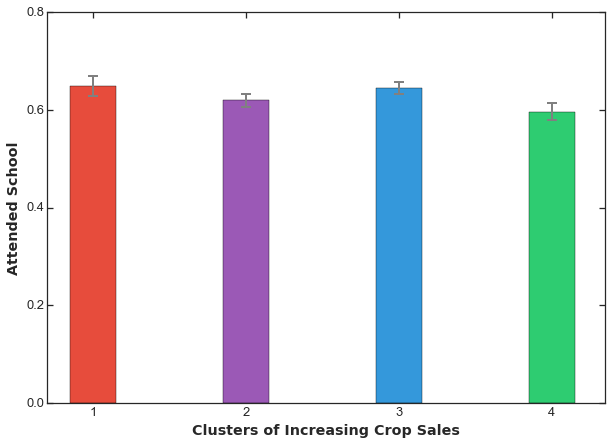

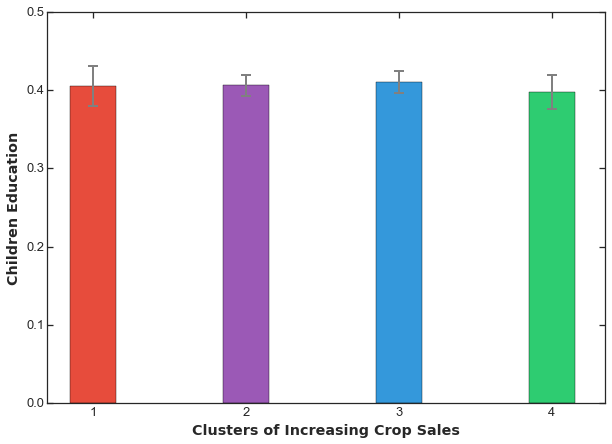

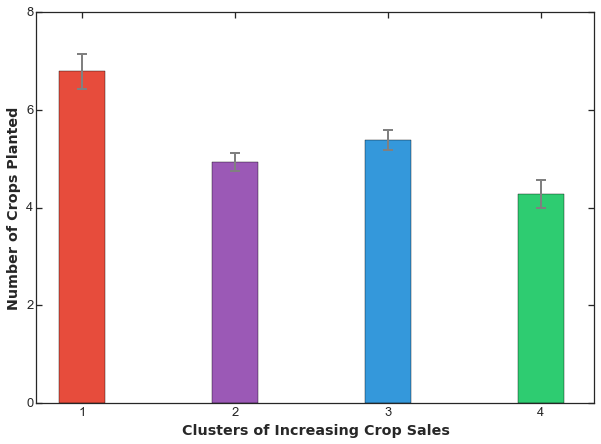

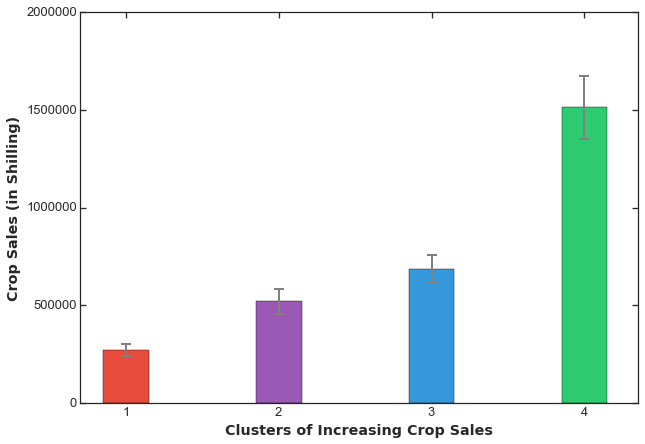

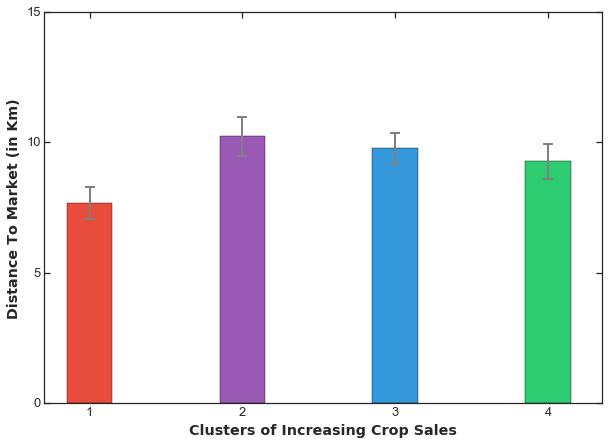

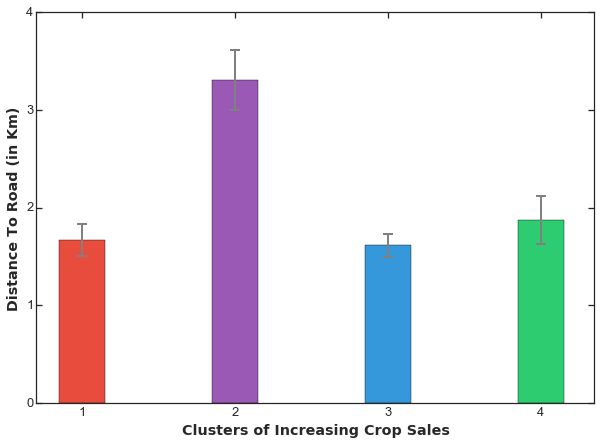

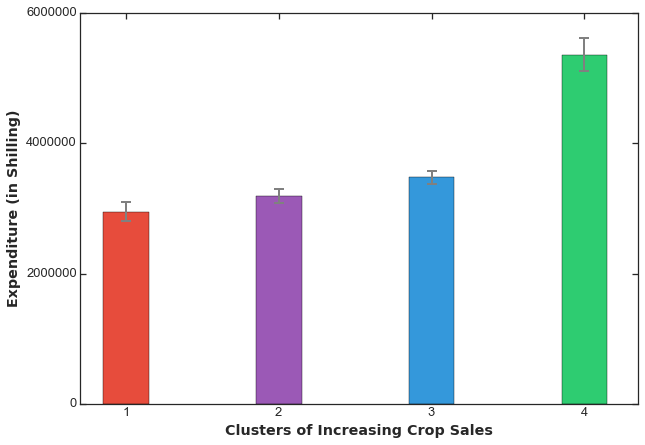

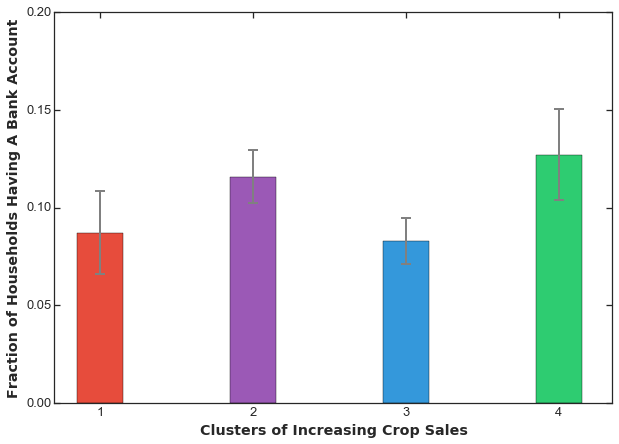

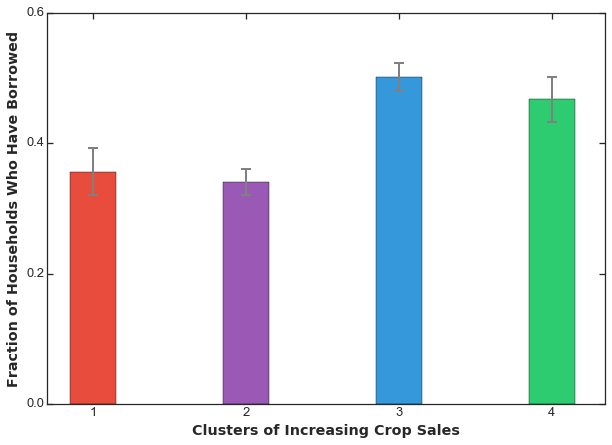

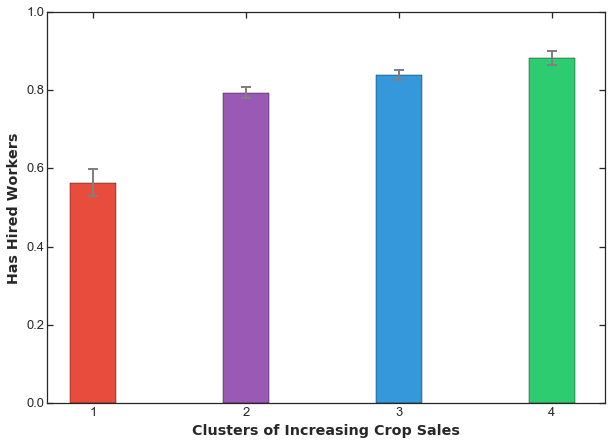

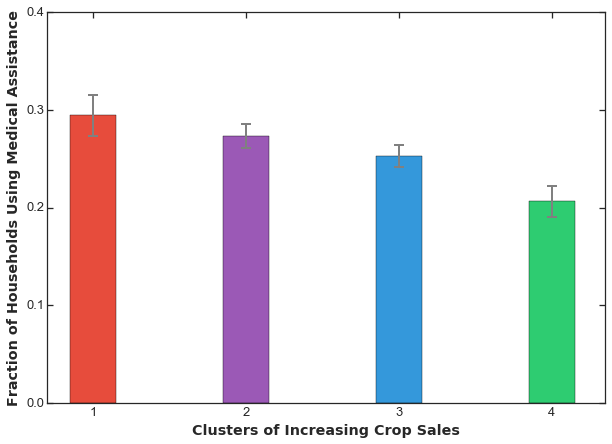

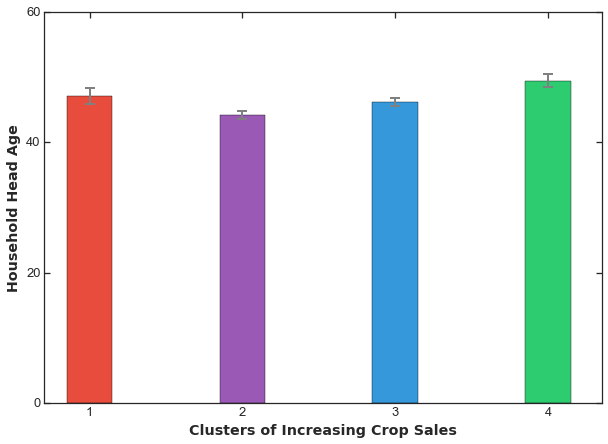

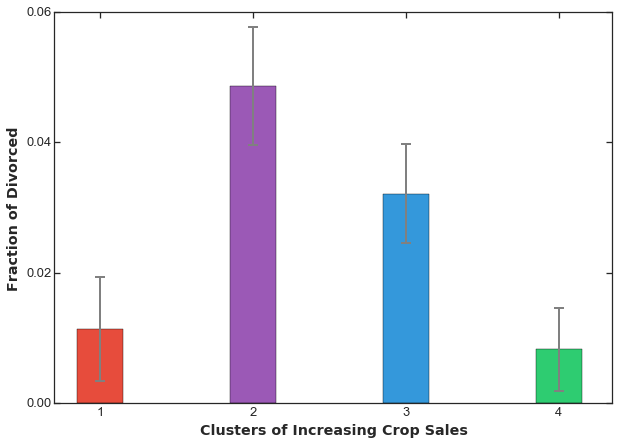

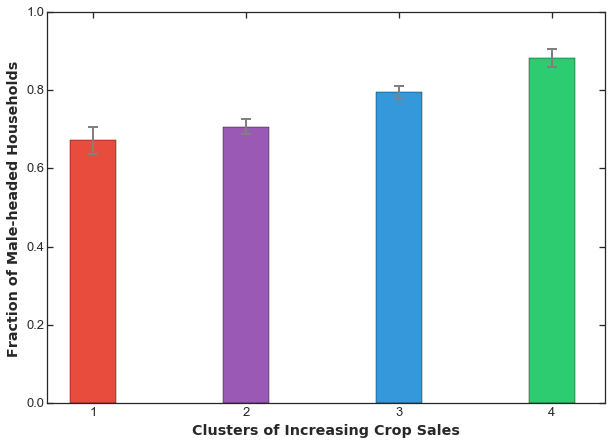

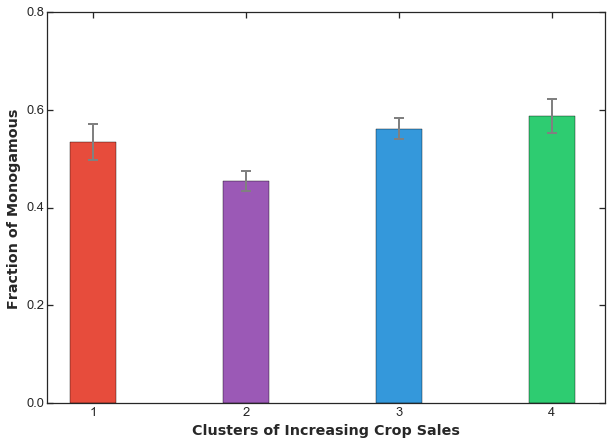

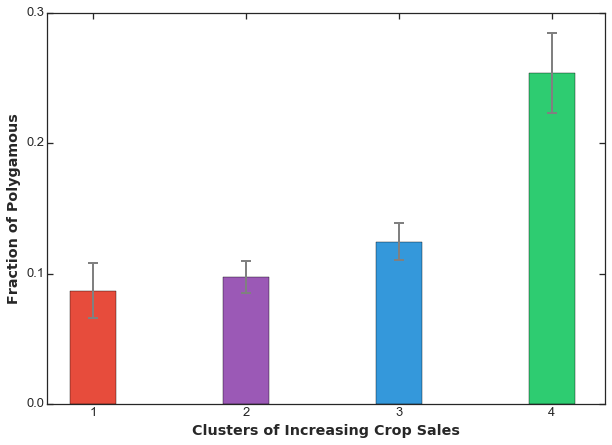

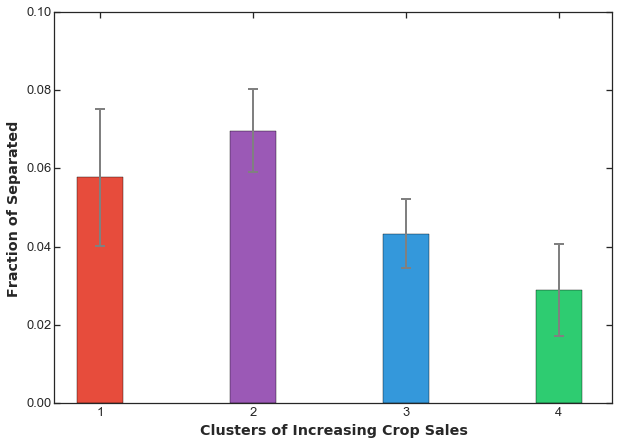

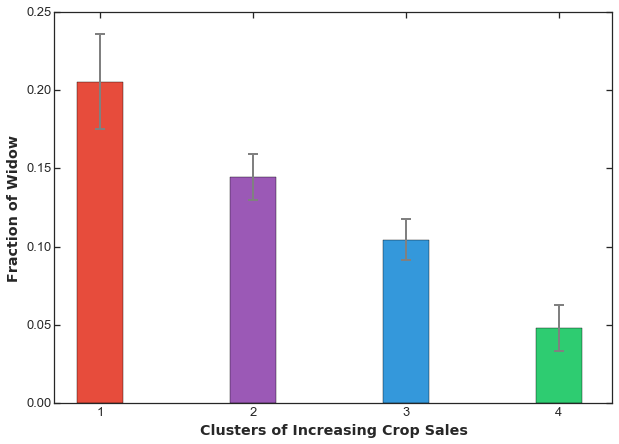

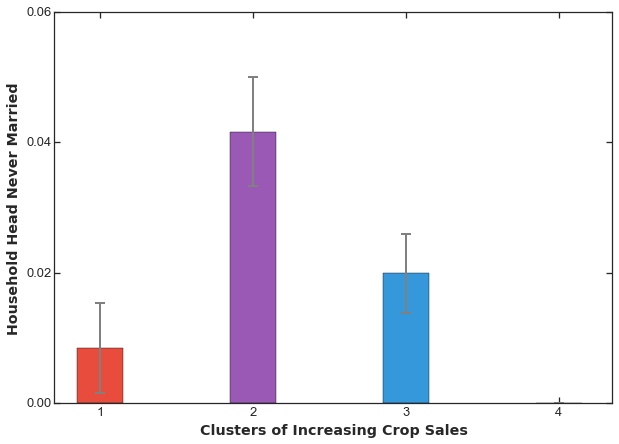

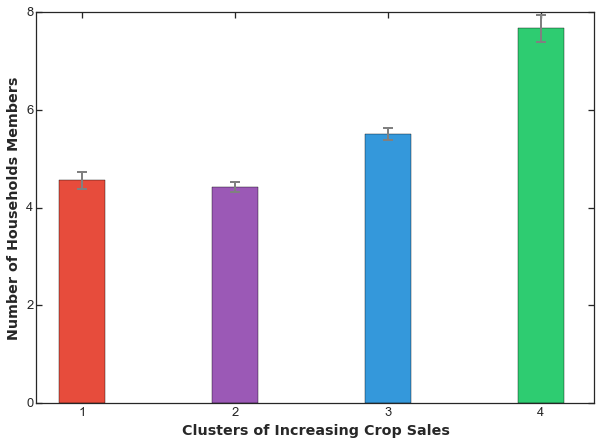

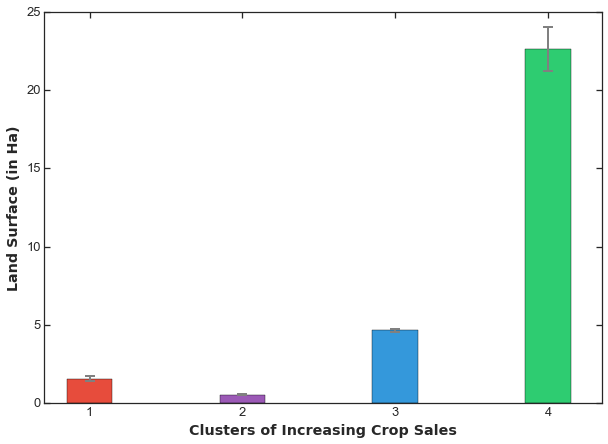

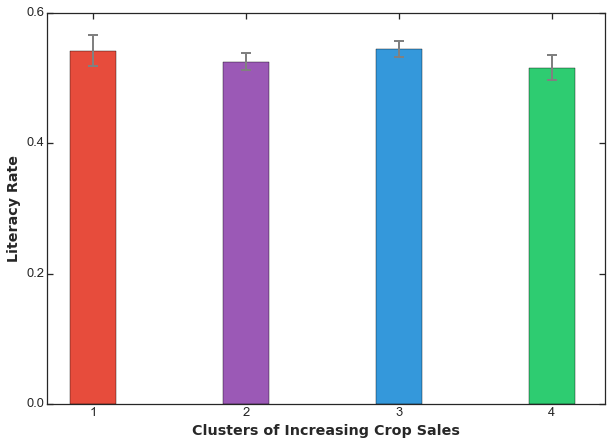

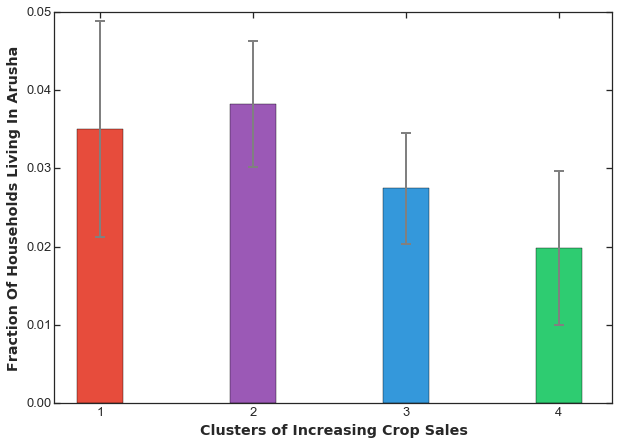

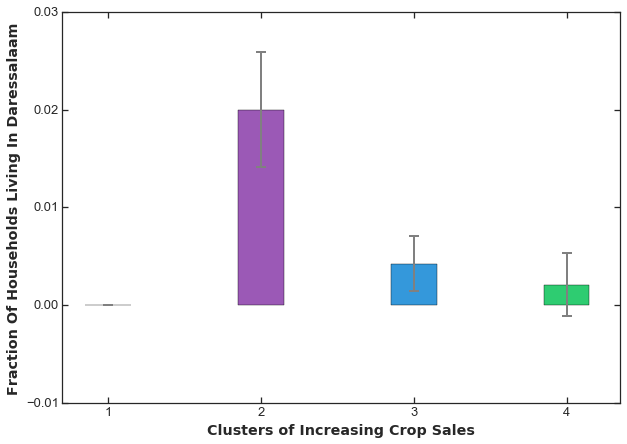

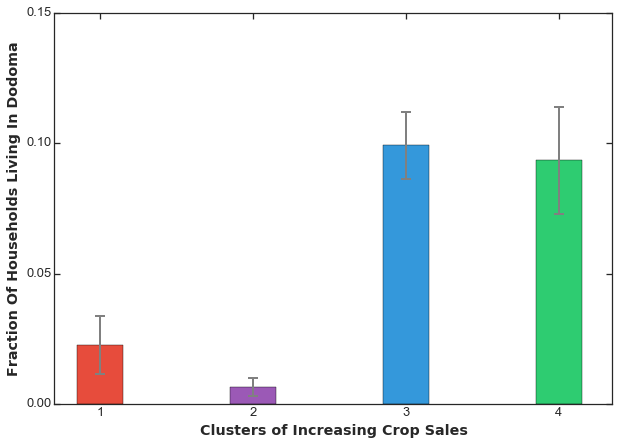

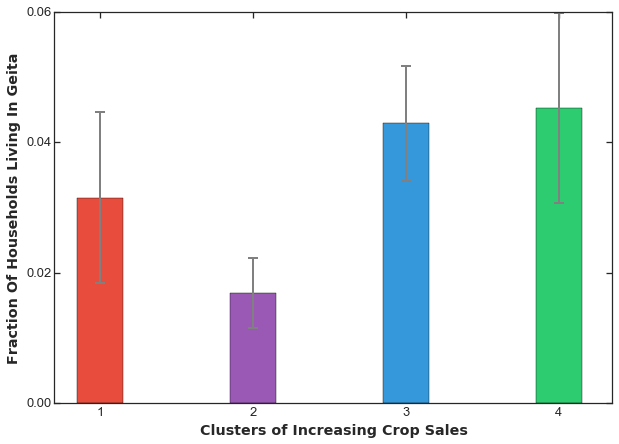

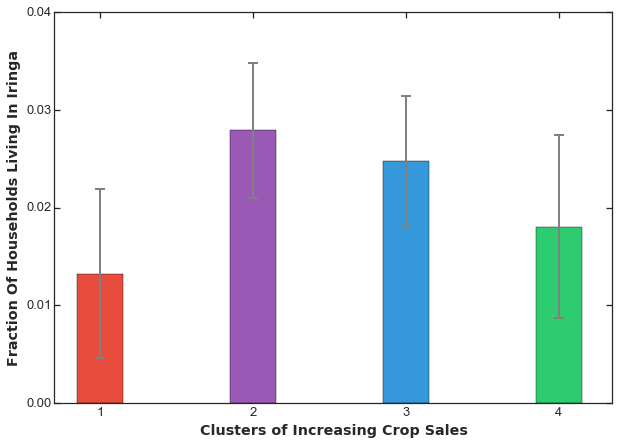

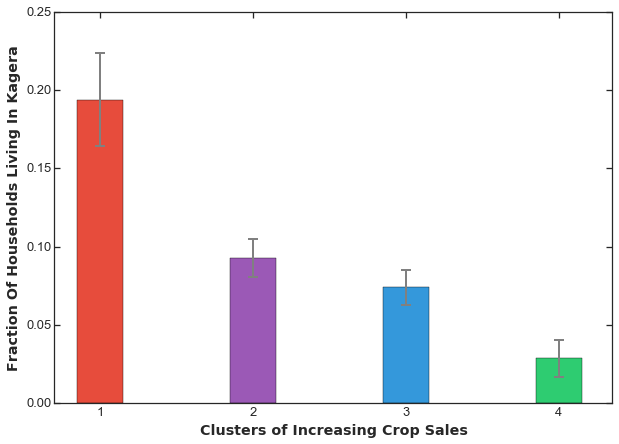

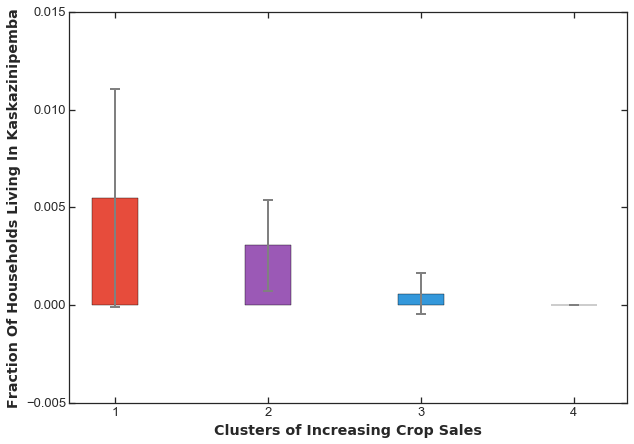

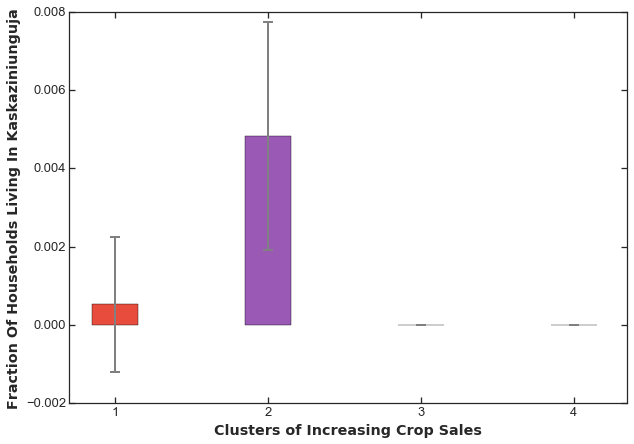

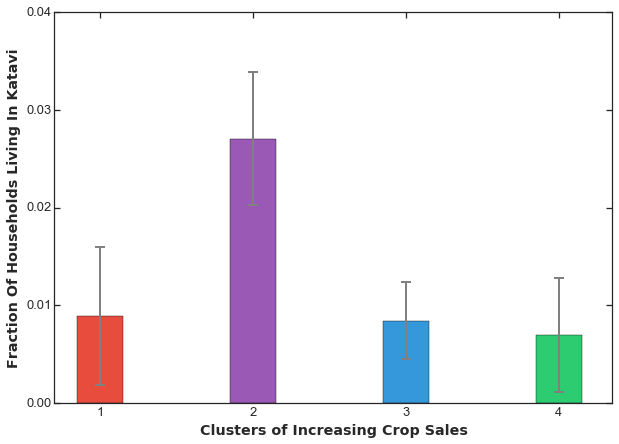

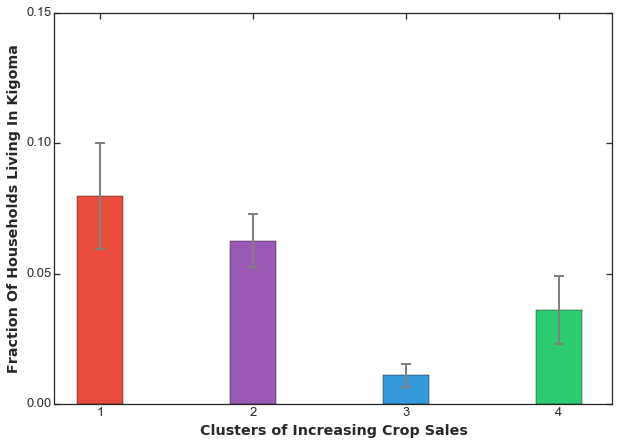

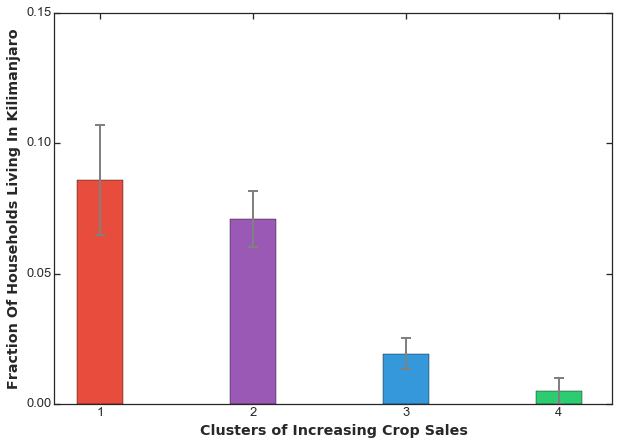

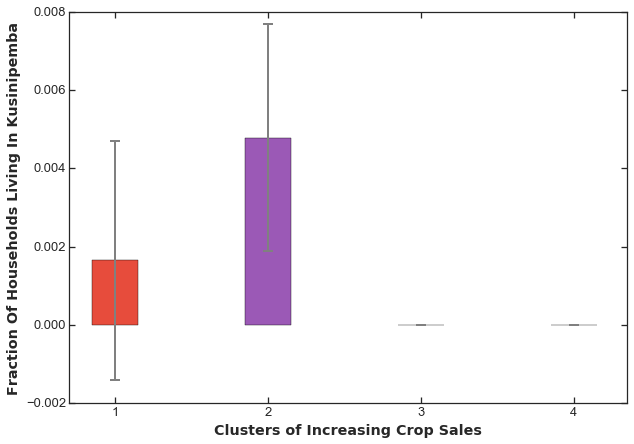

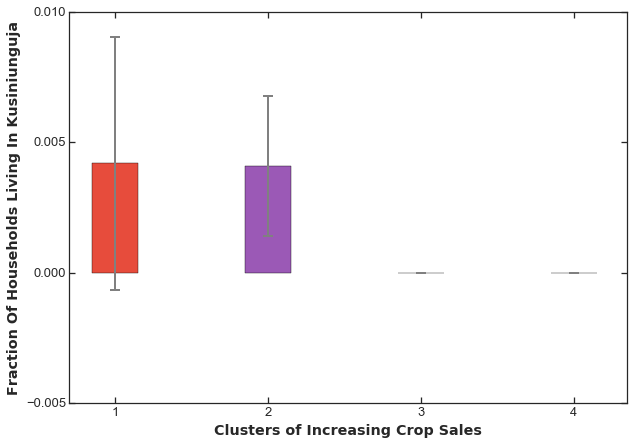

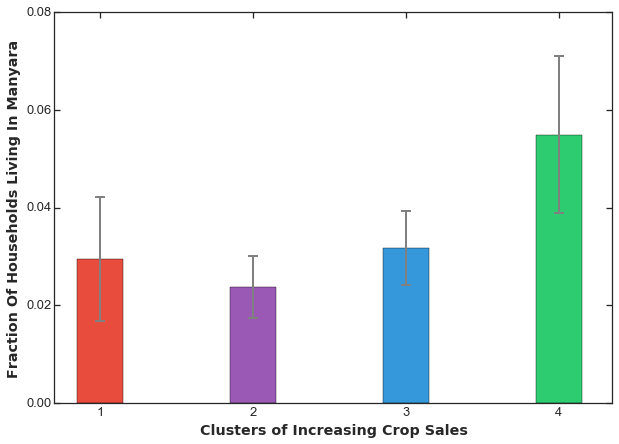

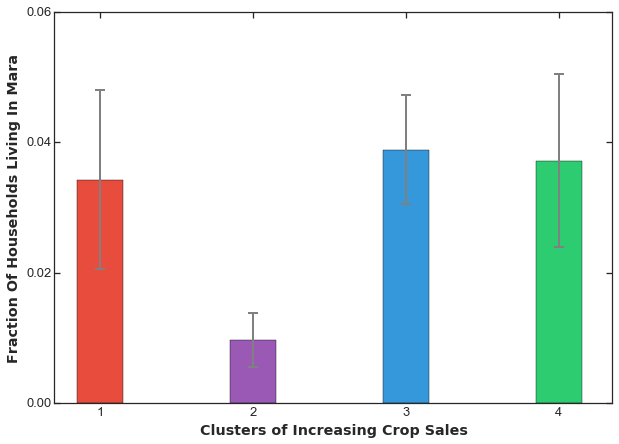

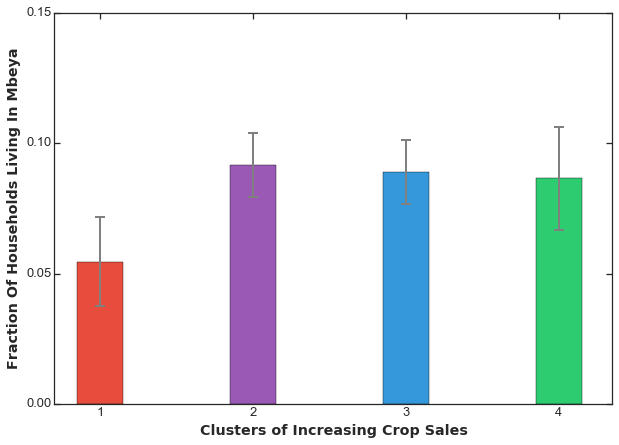

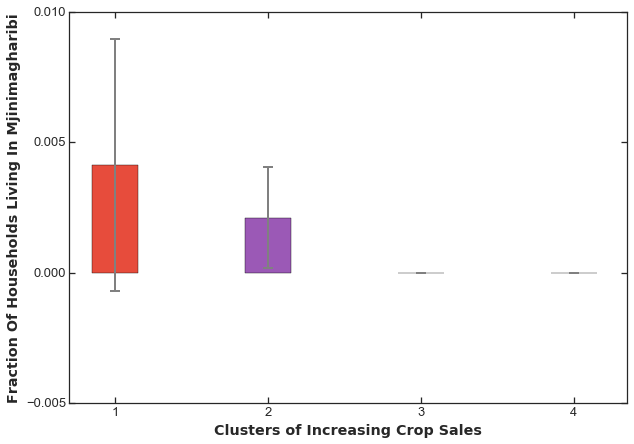

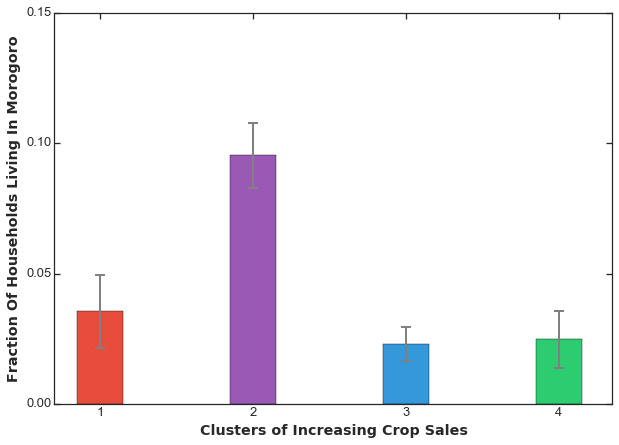

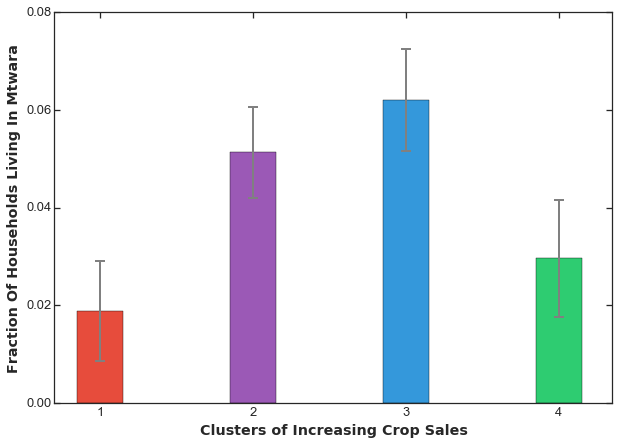

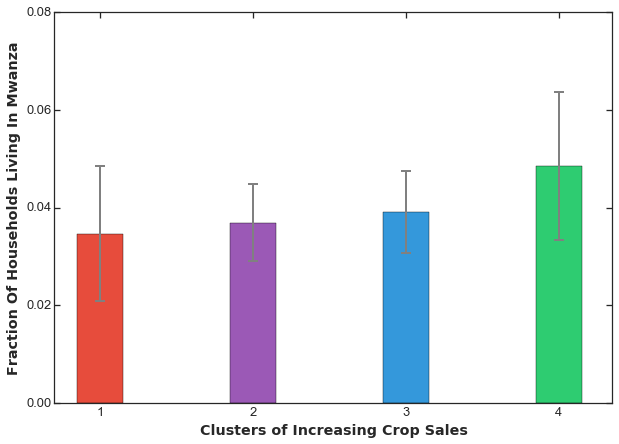

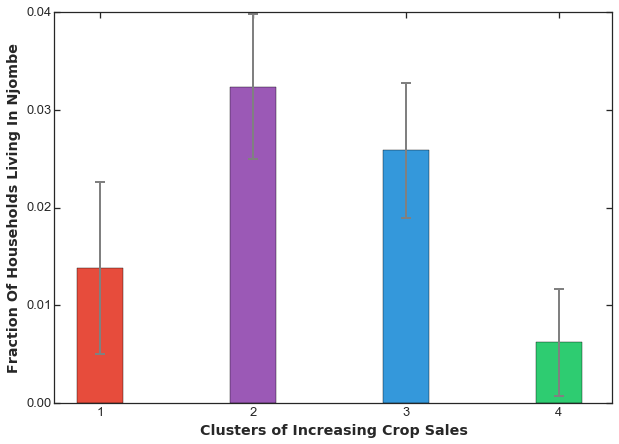

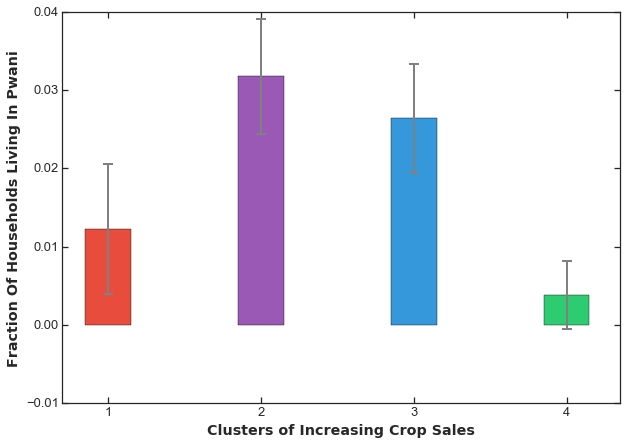

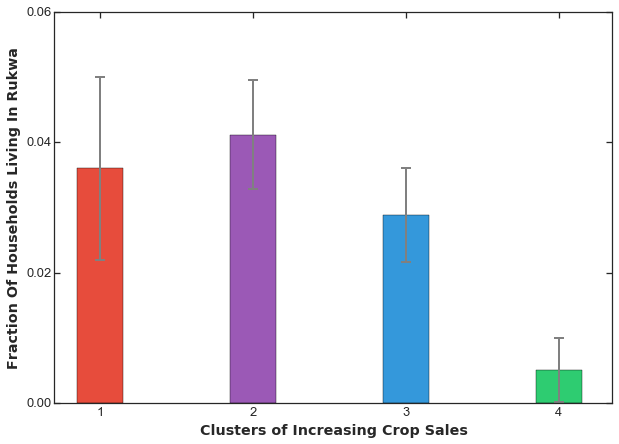

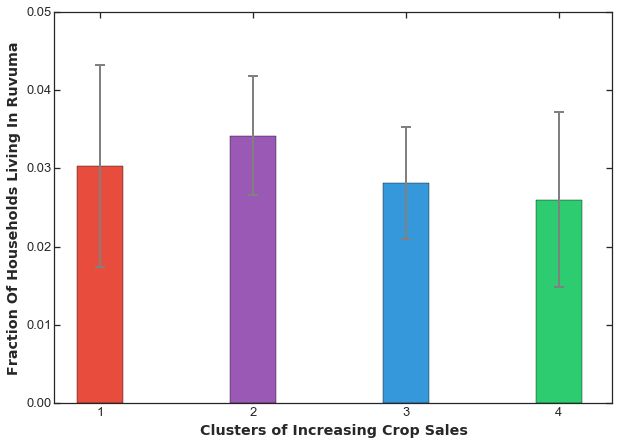

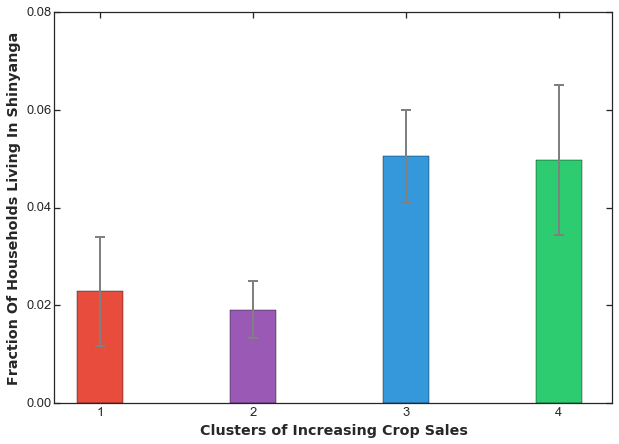

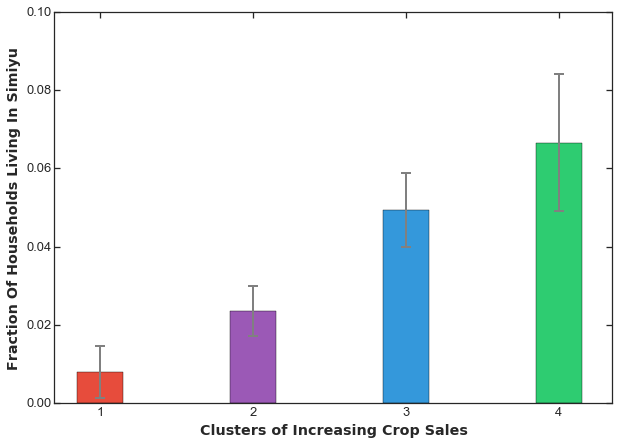

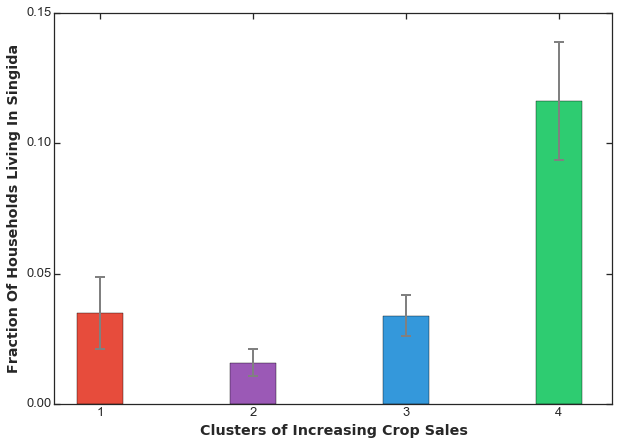

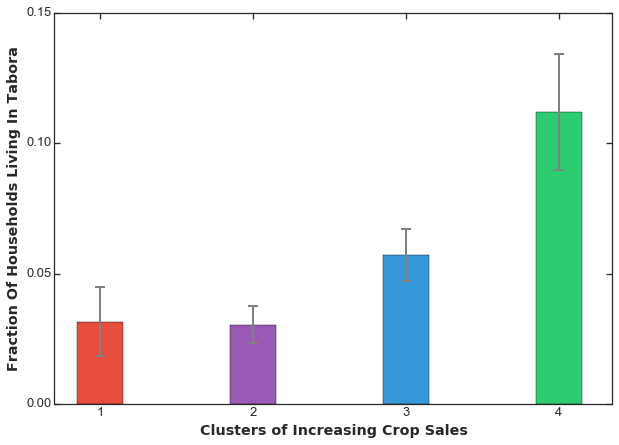

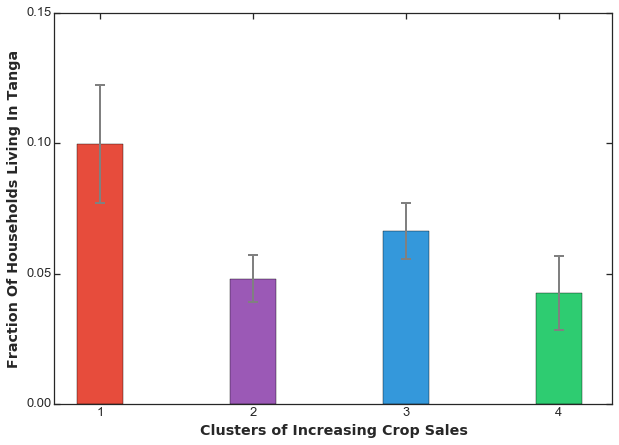

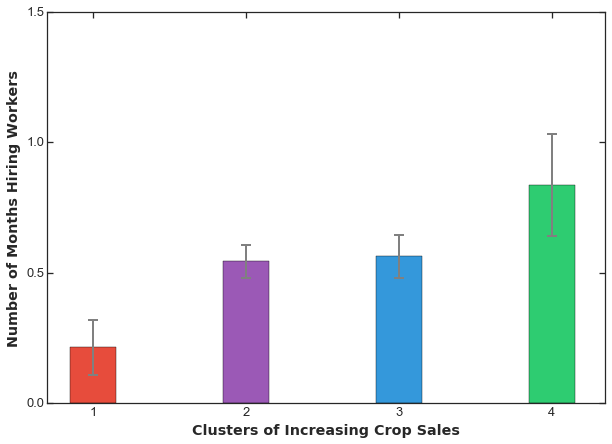

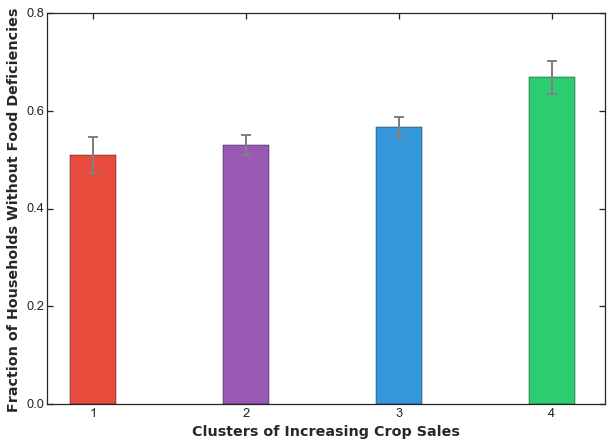

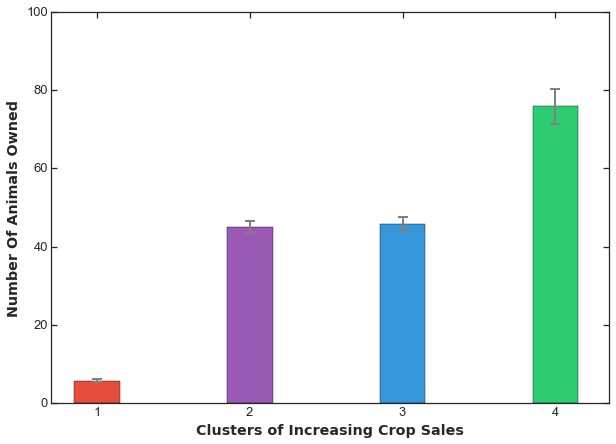

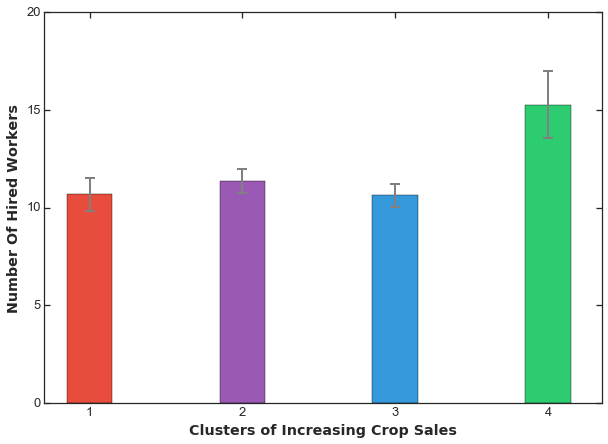

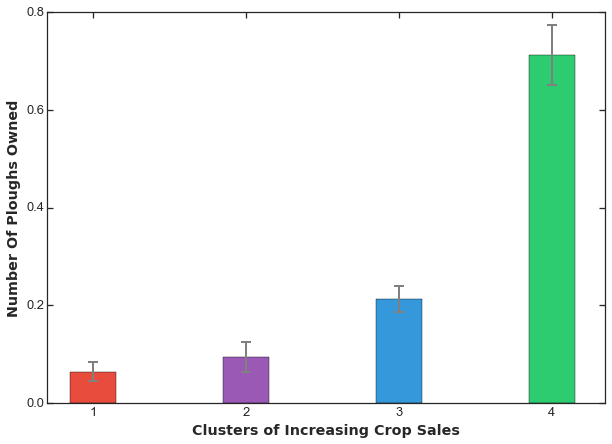

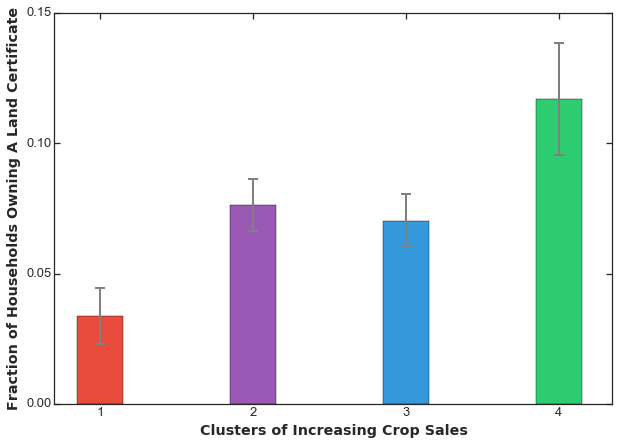

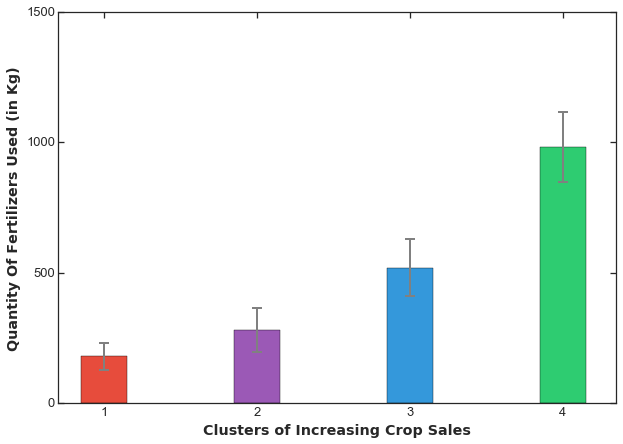

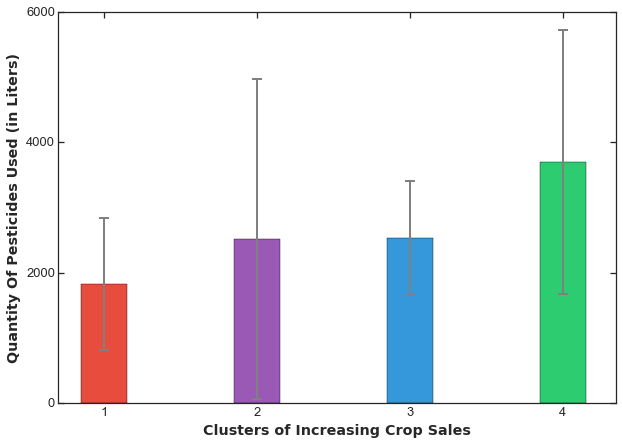

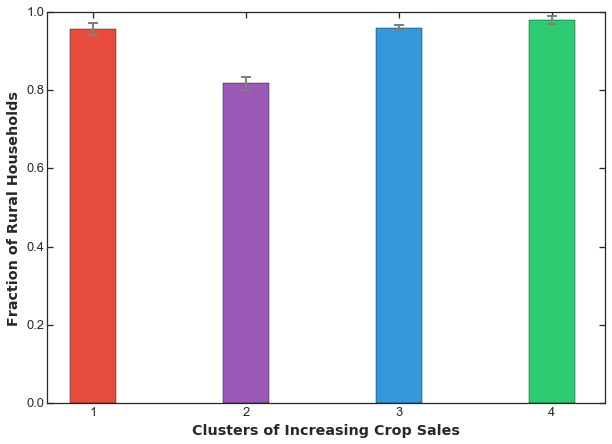

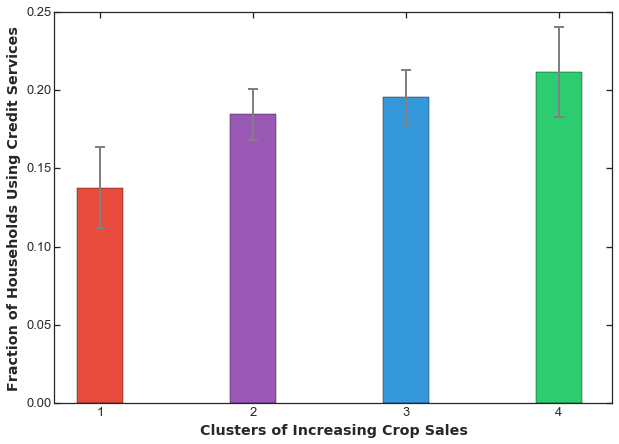

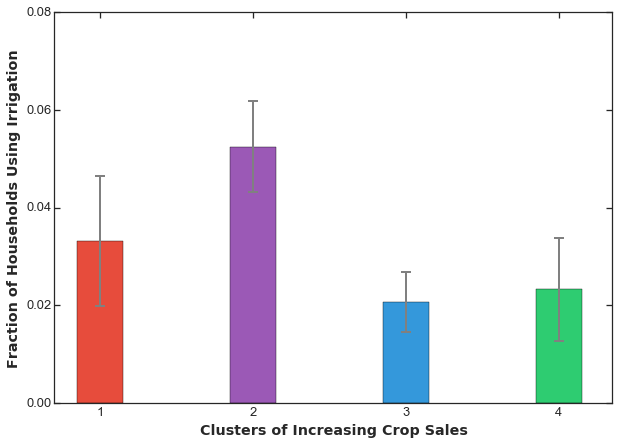

In [76]:
for i,variable in enumerate([x.replace('mean_','') for x in sum_stats.columns if 'mean' in x and x.replace('mean_','') not in to_drop]):
    
    with sns.axes_style("white"):
        sns.set_style("ticks")
        sns.set_context("talk")

        fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(10,7))

        

        ax.bar(
        sum_stats['mean_'+variable].index+1,
        sum_stats['mean_'+variable].values,
        0.3,
        yerr=sum_stats['stderr_'+variable].values,
        color=clusters_colors,
        error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2))
        
        ax.set_xticklabels(ax.get_xticklabels(),rotation=0)

        ax.set_xlabel(
        'Clusters of Increasing '+outcome.replace('___output','').replace('_',' ').title(),fontweight='bold')
        
        y_label = get_label(variable)
            
        ax.set_ylabel(y_label,fontweight='bold')
        ax.tick_params(direction='in',pad=3)
        ax.locator_params(axis='y',nbins=5)
        ax.set_xticks(sum_stats['mean_'+variable].index+1.15)
        ax.set_xticklabels((sum_stats['mean_'+variable].index+1).astype(str))
        ax.set_xlim([0.85,4.5])

    plt.savefig(
'./plots/'+country+'_v'+str(version)+'/clusters_and_'+(variable.replace(' ','_')).lower()+'_'+country+'_v'+str(version)+'.pdf', bbox_inches='tight')

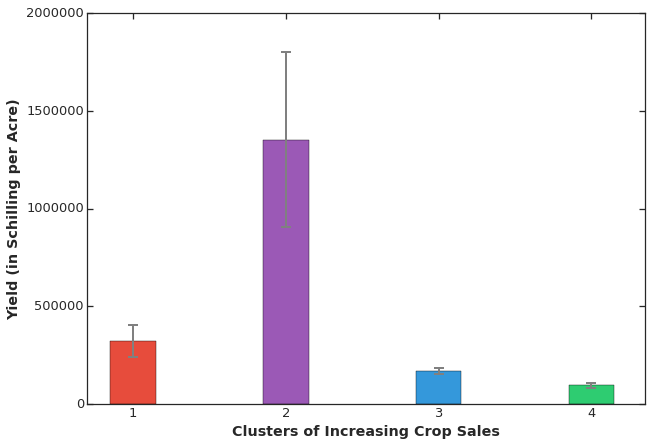

In [15]:
for i,variable in enumerate(['productivity']):
    
    with sns.axes_style("white"):
        sns.set_style("ticks")
        sns.set_context("talk")

        fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(10,7))

        

        ax.bar(
        sum_stats['mean_'+variable].index+1,
        sum_stats['mean_'+variable].values,
        0.3,
        yerr=sum_stats['stderr_'+variable].values,
        color=clusters_colors,
        error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2))
        
        ax.set_xticklabels(ax.get_xticklabels(),rotation=0)

        ax.set_xlabel(
        'Clusters of Increasing '+outcome.replace('___output','').replace('_',' ').title(),fontweight='bold')
        
        y_label = get_label(variable)
            
        ax.set_ylabel(y_label,fontweight='bold')
        ax.tick_params(direction='in',pad=3)
        ax.locator_params(axis='y',nbins=5)
        ax.set_xticks(sum_stats['mean_'+variable].index+1.15)
        ax.set_xticklabels((sum_stats['mean_'+variable].index+1).astype(str))
        ax.set_xlim([0.85,4.5])

    plt.savefig(
'./plots/'+country+'_v'+str(version)+'/clusters_and_'+(variable.replace(' ','_')).lower()+'_'+country+'_v'+str(version)+'.pdf', bbox_inches='tight')

# PCA 

In [10]:
path_to_sum_clusters_ids = './Tables/'+country+'_v'+str(version)+'/clustering_v'+str(version)+'/clus_Highly correlated policy and non-policy variables_crop_sales___output.csv'
clusters_ids = pd.read_csv(path_to_sum_clusters_ids,index_col=0)[['cluster','y4_hhid']]
clusters_ids = clusters_ids.astype(int).set_index('y4_hhid')['cluster']

clusters_counts = clusters_ids.value_counts().sort_index()

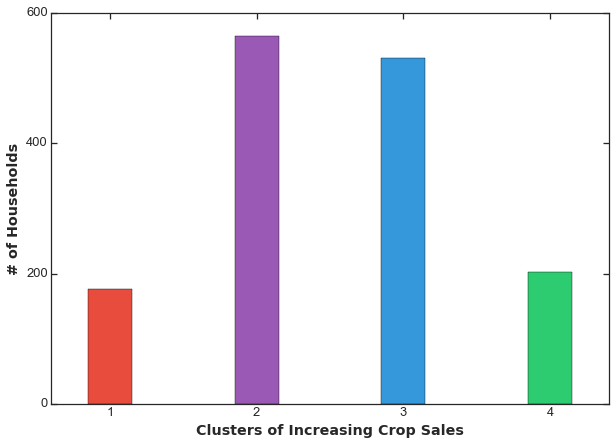

In [44]:
with sns.axes_style("white"):
    sns.set_style("ticks")
    sns.set_context("talk")
    
    fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(10,7))
      
    clusters_counts.plot(
    ax=ax,
    kind='bar',
    color=clusters_colors,
    width=0.3)
    
    ax.set_xticklabels(ax.get_xticklabels(),rotation=0)

    ax.set_xlabel(
    'Clusters of Increasing '+outcome.replace('___output','').replace('_',' ').title(),fontweight='bold')
    ax.set_ylabel('# of Households',fontweight='bold')
    ax.tick_params(direction='in',pad=3)
    ax.locator_params(axis='y',nbins=5)
    ax.set_xticklabels((clusters_counts.index+1).astype(str))

plt.savefig(
'./plots/'+country+'_v'+str(version)+'/clusters_sizes'+'_'+country+'_v'+str(version)+'.pdf', bbox_inches='tight')

In [45]:
to_log = [
'crop_sales___output',
'expenditure___output',
'crop_diversification___policy',
'number_of_animals_owned___policy',
'number_of_hired_workers___policy',
'quantity_of_fertilizers_used___policy',
'quantity_of_pesticides_used___policy',
'distance_to_road',
'distance_to_market',
'household_size',
'land_surface',
]

In [46]:
data_normed = pd.concat([
data.drop(to_drop,1,errors='ignore').drop(to_log,1),
data.drop(to_drop,1,errors='ignore')[to_log].apply(lambda x:np.log(1+x)),
clusters_ids,
],1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a112572b0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a1626bf60>]], dtype=object)

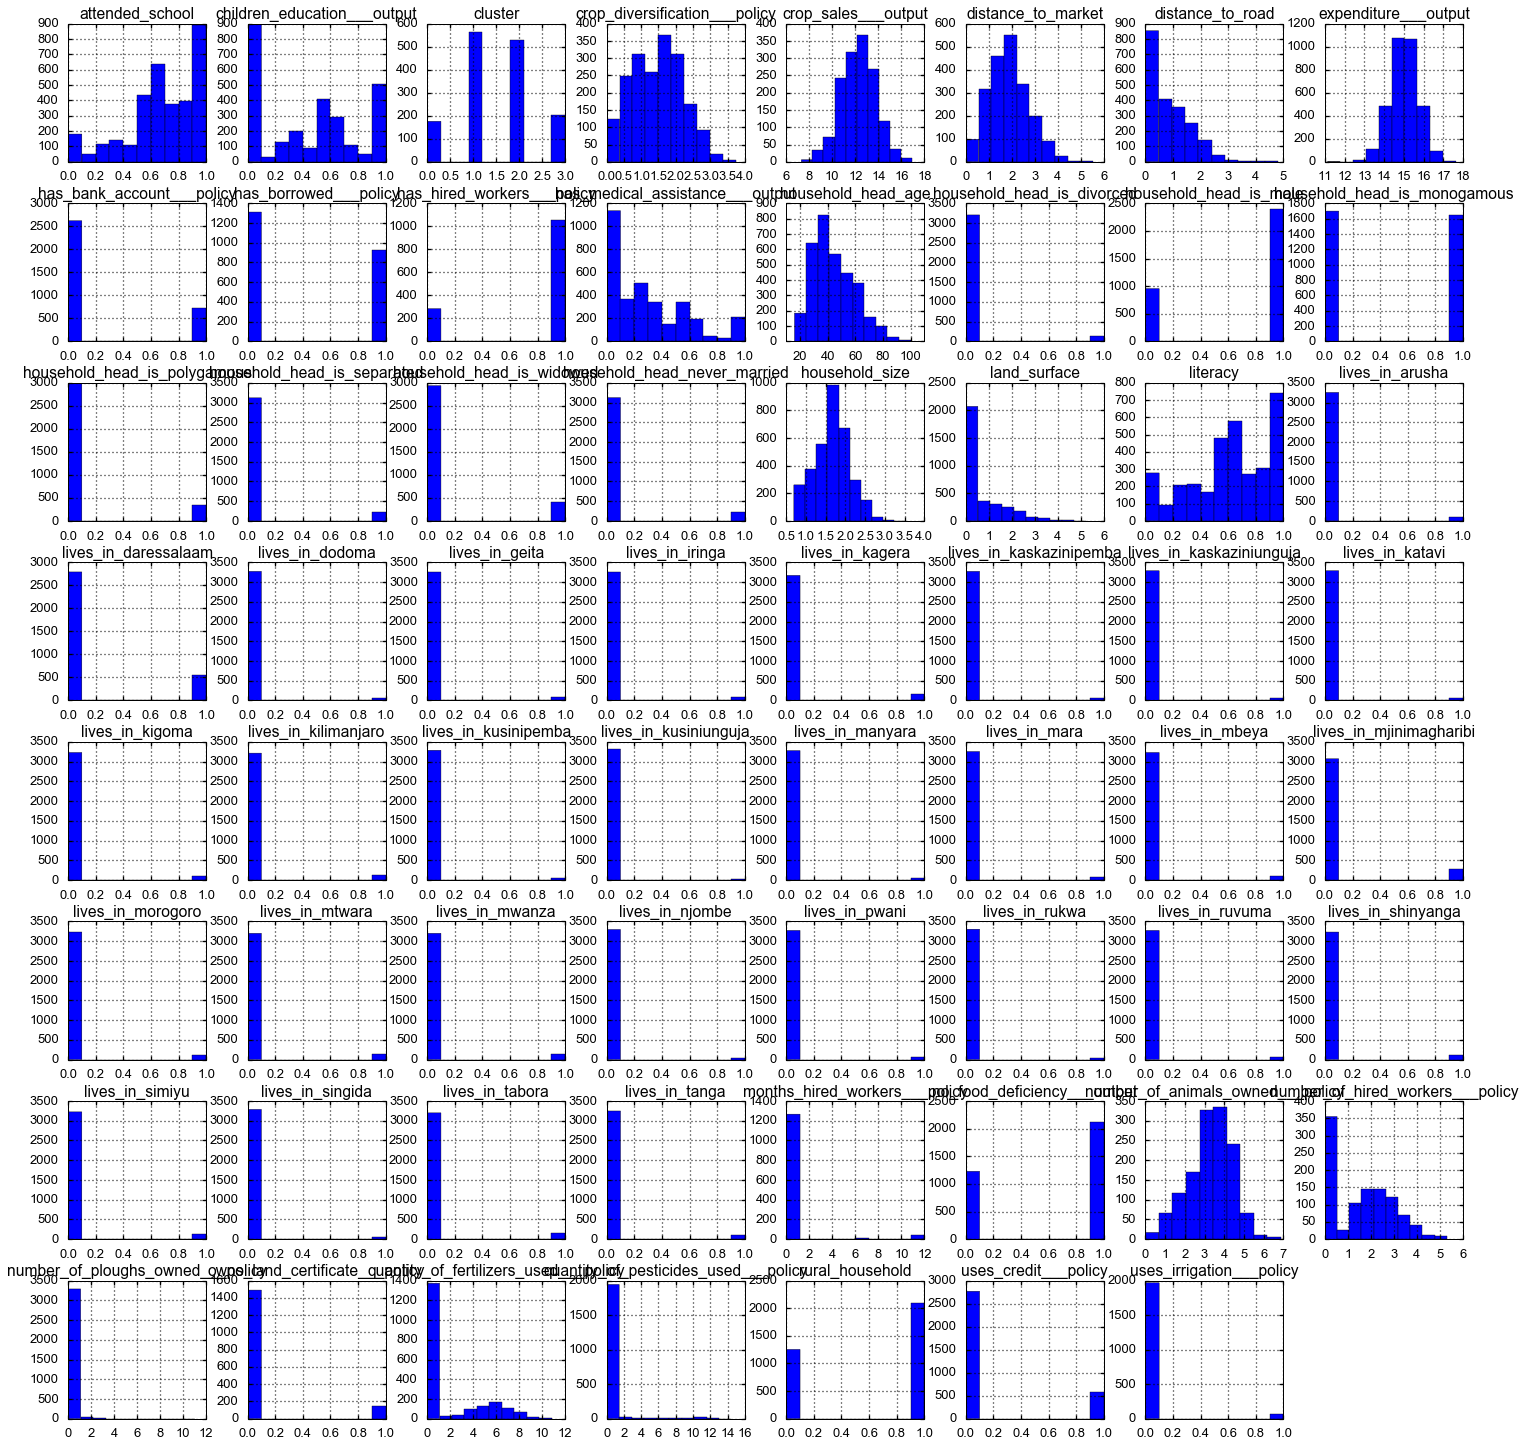

In [47]:
data_normed.hist(figsize=(25,25))

In [48]:
def get_PCA(X,cs,name_features):

    with sns.axes_style("white"):
        sns.set_style("ticks")
        sns.set_context("talk")

        fig,ax = plt.subplots(figsize=(4,3))

        X_pca = PCA(n_components=2).fit_transform(X)

        ax.scatter(
        X_pca[:, 0], 
        X_pca[:, 1],
        s=3,
        color=cs,
        alpha=0.5)

        ax.set_xlabel('PC 1',fontweight='bold')
        ax.set_ylabel('PC 2',fontweight='bold')

        ax.tick_params(direction='in',pad=3)
        ax.locator_params(axis='both',nbins=5)

#         ax.set_xlim([X_pca[:, 0].min(),X_pca[:, 0].max()])
#         ax.set_ylim([X_pca[:, 1].min(),X_pca[:, 1].max()])

    #     ax.annotate('High',xy=(-4, 3),
    #     color=sns.color_palette("coolwarm", n_cuts)[1],
    #     fontsize=12,
    #     fontweight='bold')

    #     ax.annotate('Low',
    #     xy=(-4, 4),
    #     color=sns.color_palette("coolwarm", n_cuts)[0],
    #     fontsize=12,
    #     fontweight='bold')

#         ax.set_title(name_features.replace('_',' ').title())

    plt.savefig(
    './plots/'+country+'_v'+str(version)+'/clustering_pca_'+'_'+country+'_v'+str(version)+'.pdf',bbox_inches='tight')

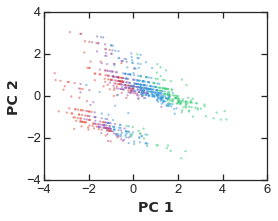

In [49]:
clustering_features = [
'has_hired_workers___policy',
'number_of_animals_owned___policy',
'household_size',
'household_head_is_widowed',
'land_surface',
]

to_PCA = pd.concat([
data_normed['cluster'],
data_normed[clustering_features].apply(lambda x:(x-x.mean())/x.std()),
],1).dropna()

to_PCA['color'] = to_PCA['cluster'].apply(lambda x:clusters_colors[int(x)])

get_PCA(to_PCA.drop([
'cluster',
'color',
],1),
to_PCA['color'],
'')

# Map

In [20]:
to_map = pd.concat([
clusters_ids.apply(lambda x:x+1).astype(np.int),
clusters_ids.apply(lambda x:clusters_colors[int(x)]).rename('cluster_color'),
data['clusterid'].rename('geocluster'),
data['latitude'],
data['longitude'],
data.filter(regex='lives'),
],1).rename(columns=lambda x:x.replace('_',' ').title()).dropna().reset_index(drop=True)

to_map['Cluster'] = to_map['Cluster'].astype(int)

to_map.to_csv('./tables/'+country+'_v'+str(version)+'/'+country+'_to_map_v'+str(version)+'.csv')

to_map.head()

,Cluster,Cluster Color,Geocluster,Latitude,Longitude,Lives In Arusha,Lives In Daressalaam,Lives In Dodoma,Lives In Geita,Lives In Iringa,...,Lives In Mwanza,Lives In Njombe,Lives In Pwani,Lives In Rukwa,Lives In Ruvuma,Lives In Shinyanga,Lives In Simiyu,Lives In Singida,Lives In Tabora,Lives In Tanga
0,4,#2ecc71,10112100000,-4.896474,35.63331,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,#3498db,10112100000,-4.896474,35.63331,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,#2ecc71,10112100000,-4.896474,35.63331,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,#2ecc71,10112100000,-4.896474,35.63331,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,#3498db,10112100000,-4.896474,35.63331,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
to_geoclusters = pd.concat([
to_map.groupby('Geocluster')['Latitude'].count().rename('# Households'),
to_map.groupby('Geocluster')['Latitude'].agg(lambda x:x.value_counts().index[0]),
to_map.groupby('Geocluster')['Longitude'].agg(lambda x:x.value_counts().index[0]),
],1)

to_geoclusters.to_csv(
'./tables/'+country+'_v'+str(version)+'/'+country+'_to_geocluster_v'+str(version)+'.csv')

to_geoclusters.head()

,# Households,Latitude,Longitude
Geocluster,,,
10112100000,8,-4.896474,35.633310
10213100000,4,-6.658715,36.082637
10310100000,6,-6.291397,36.680880
10410100000,5,-6.158228,36.208681
10510100000,6,-5.843553,35.963128


In [22]:
to_geoclusters.apply(lambda x:str(x['Latitude'])+','+str(x['Longitude']),1).to_csv('test.csv',index=False)

In [42]:
to_regions = pd.concat([
data.filter(regex='lives').idxmax(axis=1).rename('region'),
data['crop_sales___output']],1).groupby('region').mean()
                       
to_regions['Quintile of crop sales'] = pd.qcut(to_regions['crop_sales___output'],5,labels=range(1,6))

to_regions.index = to_regions.index.map(lambda x:x.title().replace('_',' '))

to_regions['Colors quintile of crop sales'] = \
to_regions['Quintile of crop sales'].apply(
lambda x:matplotlib.colors.rgb2hex(sns.color_palette("coolwarm", 5)[x-1])).values

to_regions = pd.concat([to_regions,
pd.concat([
data.filter(regex='lives').idxmax(axis=1).rename('region'),
pd.get_dummies(clusters_ids)],1).groupby('region').sum().rename(
columns=lambda x:'Cluster '+str(int(x) + 1)).astype(int).rename(
lambda x:x.title().replace('_',' '))],1)

to_regions.rename(columns={'crop_sales___output':'Crop sales'},inplace=True)
to_regions.to_csv('./tables/'+country+'_v'+str(version)+'/'+country+'_to_regions_v'+str(version)+'.csv')

to_regions.head()

,Crop sales,Quintile of crop sales,Colors quintile of crop sales,Cluster 1,Cluster 2,Cluster 3,Cluster 4
region,,,,,,,
Lives In Arusha,5.122857e+05,3,#dddcdc,8,40,38,13
Lives In Daressalaam,1.309000e+06,5,#e7745b,0,15,4,1
Lives In Dodoma,5.404146e+05,4,#f7b89c,2,2,27,10
Lives In Geita,5.215810e+05,3,#dddcdc,6,10,25,9
Lives In Iringa,3.093390e+05,1,#6f92f3,3,19,15,4


# Policy

In [69]:
path_to_coefs = './tables/'+country+'_v'+str(version)+'/coef_'+country+'.xlsx'

coefs = pd.read_excel(path_to_coefs).drop(
['Outcome',
'Year',
'Model',
'Household Segmentation',
'Var 2',
'Coef 2',
'Var 3',
'Coef 3',
'Var 4',
'Coef 4',
],1,errors='ignore')

coefs.index = [
'Cluster 1',
'Cluster 2',
'Cluster 3',
'Cluster 4',
'Full Sample']

coefs.to_csv('./tables/'+country+'_v'+str(version)+'/coef_'+country+'_v'+str(version)+'_clean.csv')
coefs

,Var 0,Coef 0,Var 1,Coef 1
Cluster 1,Number Of Ploughs Owned Policy,0.228,Has Hired Workers Policy,0.210
Cluster 2,Has Borrowed Policy,0.136,Number Of Animals Owned Policy,0.131
Cluster 3,Number Of Animals Owned Policy,0.161,Number Of Ploughs Owned Policy,0.118
Cluster 4,Has Hired Workers Policy,0.209,Uses Irrigation Policy,0.156
Full Sample,Number Of Animals Owned Policy,0.163,Has Hired Workers Policy,0.147
